In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import clean_data

# Preamble
With the anticipation of Monster Hunter Rise, I wanted to take a look at the previous games in the Monster Hunter series. The Monster Hunter is a series of video games made by Capcom that you play as a hunter that hunts various different and unique monsters. Each new installment brings new Monsters, new ways to hunt the monsters and also brings older monsters from previous games. 

| Generation 1 | Generation 2 | Generation 3 | Generation 4 | Generation 5 |
|:------------:|:------------:|:------------:|:------------:|:------------:|
|Monster Hunter|Monster Hunter Freedom 2|Monster Hunter 3|Monster Hunter 4|Monster Hunter: World|
|Monster Hunter Freedom|Monster Hunter Freedom Unite|Monster Hunter 3 Ultmate|Monster Hunter 4 Ultimate|Monster Hunter: Icebourn|
|              |              |Monster Hunter Portable 3rd|Monster Hunter Generation|Monster Hunter Rise|
|              |              |            |Monster Hunter Generation Ultimate|          |

# Clean Data
#### need to reorganize m_games to it can be joined

In [2]:
mh_data = clean_data.get_data()
mh_data

,Name,Type,Size,Title,Country Released,Date Released,Generation,Director,Console
0,Abyssal Lagiacrus,Leviathan,Large,Monster Hunter 3 Ultimate,JPN,2011-12-10,3,Kaname Fujioka,3DS
1,Abyssal Lagiacrus,Leviathan,Large,Monster Hunter 3 Ultimate,North America,2013-03-19,3,Kaname Fujioka,3DS
2,Agnaktor,Leviathan,Large,Monster Hunter 3 Ultimate,JPN,2011-12-10,3,Kaname Fujioka,3DS
3,Agnaktor,Leviathan,Large,Monster Hunter 3 Ultimate,North America,2013-03-19,3,Kaname Fujioka,3DS
4,Alatreon,Elder Dragon,Large,Monster Hunter 3 Ultimate,JPN,2011-12-10,3,Kaname Fujioka,3DS
...,...,...,...,...,...,...,...,...,...
2383,Vespoid,Neopteron,Small,Monster Hunter Freedom,North America,2006-05-23,1,Yasunori Ichinose,Playstation Portable
2384,White Monoblos,Flying Wyvern,Large,Monster Hunter Freedom,JPN,2005-12-01,1,Yasunori Ichinose,Playstation Portable
2385,White Monoblos,Flying Wyvern,Large,Monster Hunter Freedom,North America,2006-05-23,1,Yasunori Ichinose,Playstation Portable
2386,Yian Kut-Ku,Bird Wyvern,Large,Monster Hunter Freedom,JPN,2005-12-01,1,Yasunori Ichinose,Playstation Portable


In [3]:
analysis_titles = pd.DataFrame(
    {"Base": pd.Series(['Monster Hunter','Monster Hunter Freedom 2', 'Monster Hunter 3', 'Monster Hunter Portable 3rd',
              'Monster Hunter 4','Monster Hunter Generations', 'Monster Hunter: World', 'Monster Hunter Rise',]),
     "Ultimate": pd.Series(['Monster Hunter Freedom', 'Monster Hunter Freedom Unite', 'Monster Hunter 3 Ultimate', np.nan, 
            'Monster Hunter 4 Ultimate', 'Monster Hunter Generations Ultimate', 'Monster Hunter World: Iceborne', np.nan,])})

analysis_titles = analysis_titles['Base'].append(analysis_titles['Ultimate']).dropna()
titles_search_data = mh_data
valid_titles = mh_data[['Title','Generation']].drop_duplicates().sort_values(by=['Generation','Title'])
valid_titles = valid_titles[valid_titles['Title'].isin(analysis_titles) == True]
valid_titles = valid_titles.groupby(['Generation']).agg(list)
output = []

for row in valid_titles.iterrows():
    labels = []
    amt_monsters = []
    large_monters = []
    small_monsters = []
    total_new_monsters = []
    new_large_monsters = []
    new_small_monsters = []
    for title in row[1][0]:
        filter_title = titles_search_data['Title'] == title
        filter_region =  mh_data['Country Released'] == 'North America'
        title_region_data = titles_search_data.where(filter_title).dropna()['Date Released'].drop_duplicates()
        date = max(title_region_data.to_list())
        older_titles = mh_data['Date Released'] < date
        
        monsters_from_prev_games = titles_search_data.where(filter_region & older_titles).dropna()[['Name','Type','Size']].drop_duplicates()
        monsters_in_title = titles_search_data.where(filter_title).dropna()[['Name','Size']].drop_duplicates()
        new_monsters = monsters_in_title[monsters_in_title['Name'].isin(monsters_from_prev_games['Name']) == False]
        title_data = titles_search_data.where(filter_title).dropna()[['Name','Size']].drop_duplicates()
        
        labels.append(title)
        amt_monsters.append( title_data['Name'].drop_duplicates().count() )
        large_monters.append( title_data.groupby(['Size']).size().Large )
        small_monsters.append( title_data.groupby(['Size']).size().Small )
        total_new_monsters.append( new_monsters['Name'].count() )
        try:
            new_large_monsters.append( new_monsters.groupby(['Size']).size().Large )
        except:
            new_large_monsters.append( 0 )
        try:
            new_small_monsters.append( new_monsters.groupby(['Size']).size().Small )
        except:
            new_small_monsters.append( 0 )
    output.append( [labels,amt_monsters,large_monters,small_monsters,total_new_monsters,new_large_monsters,new_small_monsters] )   

In [4]:
def alter_title(title):
    return title[:15] + '\n' + title[15:]
width = 0.25
i = 1
for gen in output:
    str_g = "Generation %s " % i
    labels = gen[0]
    amt_monsters = gen[1]
    large_monters = gen[2]
    small_monsters = gen[3]
    total_new_monsters = gen[4]
    new_large_monsters = gen[5]
    new_small_monsters = gen[6]
    rects1 = np.arange(len(labels))
    rects2 = [x + width for x in rects1]
    rects3 = [x + width for x in rects2]
    rects4 = rects1
    rects5 = rects2
    rects6 = rects3
    
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(10, 8), dpi=80)
    plt.bar(rects1, amt_monsters, width=width,edgecolor='white', label='Total Monsters')
    plt.bar(rects2, large_monters, width=width,edgecolor='white', label='Large Monsters')
    plt.bar(rects3, small_monsters, width=width,edgecolor='white', label='Small Monsters')
    plt.bar(rects4, total_new_monsters, width=width,edgecolor='white', label='New Monsters')
    plt.bar(rects5, new_large_monsters, width=width,edgecolor='white', label='New Large Monsters')
    plt.bar(rects6, new_small_monsters, width=width,edgecolor='white', label='New Small Monsters')
    labels = map(alter_title, labels)
    plt.title(str_g)
    plt.xticks([r + width for r in range(len(amt_monsters))], labels)
    plt.legend()
    plt.savefig("Figures/amt_monsters_" + str_g.replace(" ","") + ".png")
    plt.clf()
    i = i + 1

<Figure size 800x640 with 0 Axes>

<Figure size 800x640 with 0 Axes>

<Figure size 800x640 with 0 Axes>

<Figure size 800x640 with 0 Axes>

<Figure size 800x640 with 0 Axes>

In [5]:

monster_occurance_data = mh_data[mh_data['Title'].isin(analysis_titles) == True]
filter_exclude_jpn = monster_occurance_data['Country Released'] != 'JPN'
filter_title_except = monster_occurance_data['Title'] == 'Monster Hunter Portable 3rd'
filter_large = monster_occurance_data['Size'] == 'Large'
monster_occurance_data_p1 = monster_occurance_data.where(filter_exclude_jpn & filter_large).dropna()
monster_occurance_data_p2 = monster_occurance_data.where(filter_title_except& filter_large).dropna()
monster_occurance_data = pd.concat([monster_occurance_data_p1,monster_occurance_data_p2])
monster_occurance_data = monster_occurance_data.groupby(['Name'])['Type'].count().sort_values(ascending=True)
monster_occurance_data
# plt.hist(monster_occurance_data.values)

Name
Abyssal Lagiacrus        1
Drilltusk Tetsucabra     1
Dreadqueen Rathian       1
Dreadking Rathalos       1
Silverwind Nargacuga     1
                        ..
Felyne                  10
Kushala Daora           10
Diablos                 14
Rathalos                14
Rathian                 14
Name: Type, Length: 214, dtype: int64

(array([48., 11., 23., 27.,  6.,  3.,  6.,  0.,  0.,  3.]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <a list of 10 Patch objects>)

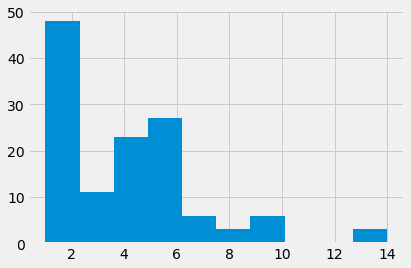

In [27]:
import re
monster_occurance_data_df = monster_occurance_data.to_frame().reset_index()
newIndex = monster_occurance_data_df['Name'].str.len().sort_values().index
monster_occurance_data_df = monster_occurance_data_df.reindex(newIndex)
list_monsters = monster_occurance_data_df['Name'].to_list()
for monster in list_monsters:
    m = re.compile(monster)
    for monsterX in list_monsters:
        if m.search(monsterX):
            if monsterX != monster:
                list_monsters.remove(monsterX)
list_nonVarient_monsters = list_monsters
monster_occurance_data_df = monster_occurance_data_df[monster_occurance_data_df['Name'].isin(list_nonVarient_monsters) == True]
plt.hist(monster_occurance_data_df['Type'])